In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

import matplotlib.ticker as mtick

import glob

In [4]:
df = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv', \
                 parse_dates=True)

In [5]:
df = df[df['Country/Region'] == 'Canada']

In [6]:
df = df[df['Province/State'] != 'Diamond Princess']
df = df[df['Province/State'] != 'Grand Princess']

In [7]:
df = df.groupby('Province/State').sum()

In [8]:
df

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
Province/State,,,,,,,,,,,,,,,,,,,,,
Alberta,53.9333,-116.5765,0,0,0,0,0,0,0,0,...,146,195,259,301,359,358,486,542,542,621
British Columbia,49.2827,-123.1207,0,0,0,0,0,0,1,1,...,271,424,424,472,617,617,725,725,884,884
Manitoba,53.7609,-98.8139,0,0,0,0,0,0,0,0,...,17,18,20,20,21,35,36,39,64,72
New Brunswick,46.5653,-66.4619,0,0,0,0,0,0,0,0,...,11,17,17,17,18,18,33,45,51,66
Newfoundland and Labrador,53.1355,-57.6604,0,0,0,0,0,0,0,0,...,4,6,9,24,35,35,82,102,120,135
Northwest Territories,64.8255,-124.8457,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
Nova Scotia,44.6820,-63.7443,0,0,0,0,0,0,0,0,...,15,21,28,41,51,68,73,90,110,122
Ontario,51.2538,-85.3232,0,0,0,0,1,1,1,1,...,308,377,425,503,588,688,858,994,1144,1355
Prince Edward Island,46.5107,-63.4168,0,0,0,0,0,0,0,0,...,2,2,3,3,3,5,5,9,11,11


In [9]:
df = df.T
df = df.drop('Lat')
df = df.drop('Long')

In [10]:
df.columns

Index(['Alberta', 'British Columbia', 'Manitoba', 'New Brunswick',
       'Newfoundland and Labrador', 'Northwest Territories', 'Nova Scotia',
       'Ontario', 'Prince Edward Island', 'Quebec', 'Recovered',
       'Saskatchewan', 'Yukon'],
      dtype='object', name='Province/State')

In [11]:
df.index = pd.to_datetime(df.index)

In [12]:
df.index.name = 'Date'

In [13]:
today = df.iloc[-1]

In [14]:
condition = today[(today >= 10)].index

In [15]:
print(condition)

Index(['Alberta', 'British Columbia', 'Manitoba', 'New Brunswick',
       'Newfoundland and Labrador', 'Nova Scotia', 'Ontario',
       'Prince Edward Island', 'Quebec', 'Saskatchewan'],
      dtype='object', name='Province/State')


In [16]:
min_case_num = 10
title_name = "Canada"

In [17]:
data = {}
data_original = {}

for s in condition:
    state = df[s]
    state0 = state[state > min_case_num]
    
    state0 = state0.reset_index()
    state0 = state0[s]
    
    data[s] = state0
    data_original[s] = df[s]

Text(0.5, 0, 'Days after passing 10 confirmed cases')

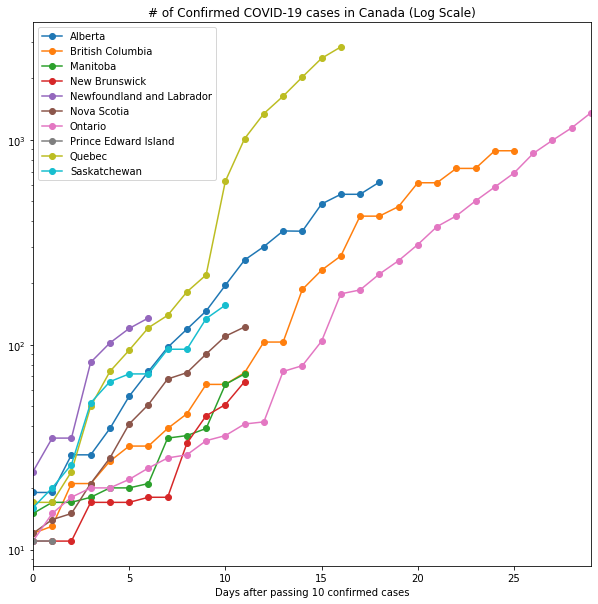

In [18]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(10, 10))

for s in data.keys():
    data[s].plot(logy=True, marker='o')

axes.legend()
axes.set_title("# of Confirmed COVID-19 cases in "+title_name+" (Log Scale)")
axes.set_xlabel("Days after passing "+str(min_case_num)+" confirmed cases")

Text(0.5, 0, 'Days after passing 10 confirmed cases')

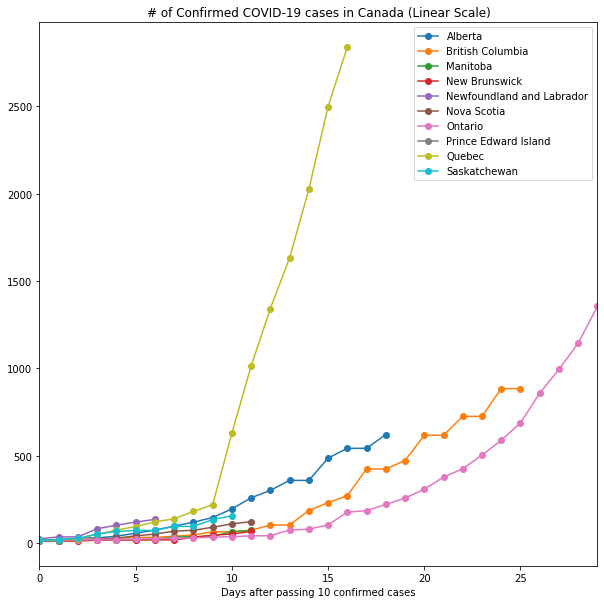

In [19]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(10, 10))

for s in data.keys():
    data[s].plot(marker='o')

axes.legend()
axes.set_title("# of Confirmed COVID-19 cases in "+title_name+" (Linear Scale)")
axes.set_xlabel("Days after passing "+str(min_case_num)+" confirmed cases")

Text(0.5, 0, 'Dates')

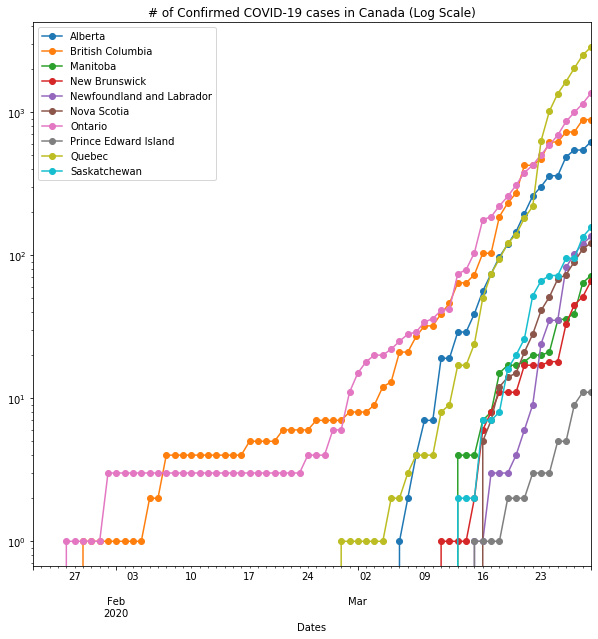

In [20]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(10, 10))

for s in data.keys():
    data_original[s].plot(logy=True, marker='o')

axes.legend()
axes.set_title("# of Confirmed COVID-19 cases in "+title_name+" (Log Scale)")
axes.set_xlabel("Dates")

Text(0.5, 0, 'Dates')

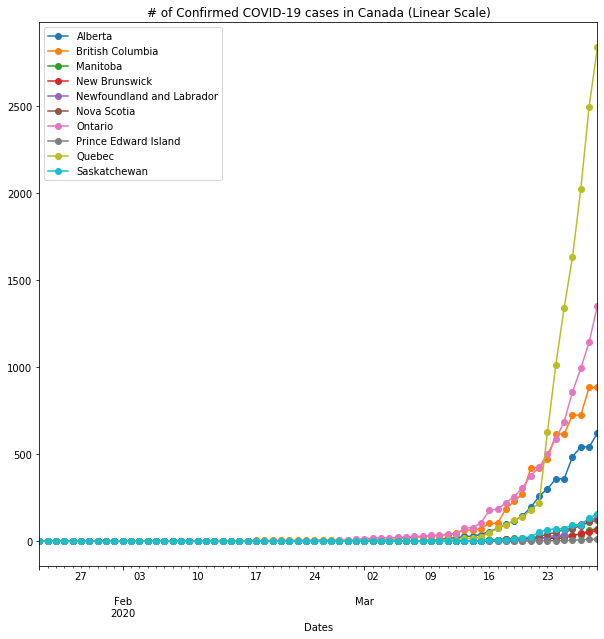

In [21]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(10, 10))

for s in data.keys():
    data_original[s].plot(marker='o')

axes.legend()
axes.set_title("# of Confirmed COVID-19 cases in "+title_name+" (Linear Scale)")
axes.set_xlabel("Dates")

In [22]:
today.sum()

6267.0

Text(0.5, 0, 'Days after passing 10 confirmed cases')

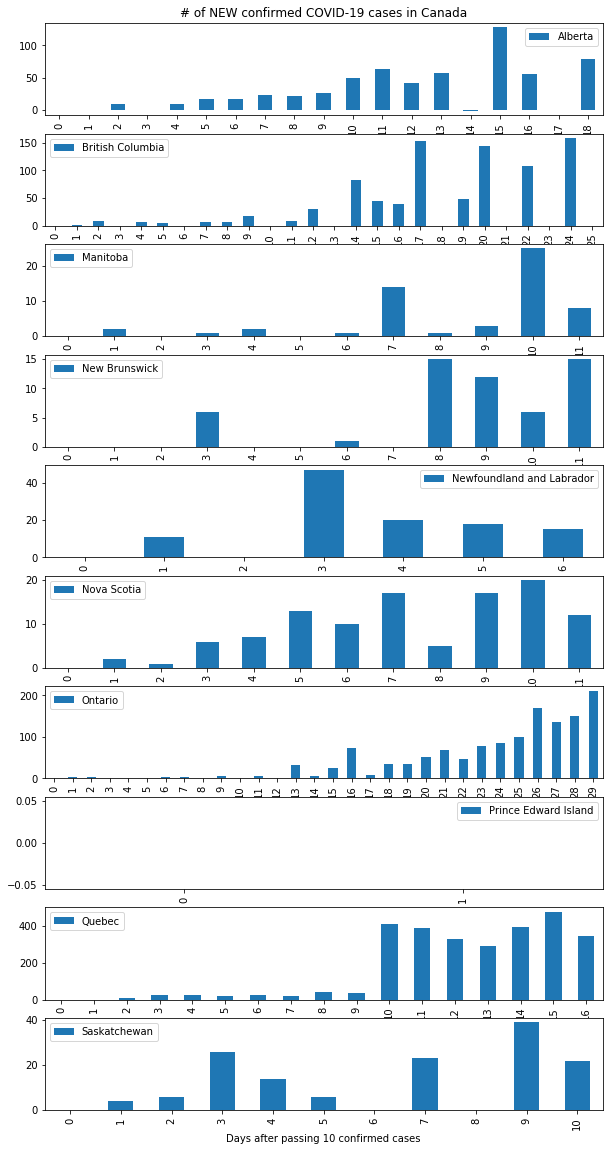

In [23]:
fig, axes = plt.subplots(len(data.keys()), figsize=(10, 20))

i = 0
for c in data.keys():
    data[c].diff().plot(ax=axes[i], kind="bar")
    axes[i].legend()
    i += 1

axes[0].set_title("# of NEW confirmed COVID-19 cases in " + title_name)
axes[-1].set_xlabel("Days after passing " + str(min_case_num) + " confirmed cases")

In [24]:
for c in data.keys():
    if len(data[c]) > 1:
        growth_rate = data[c].tail(5).pct_change().mean()
        num_cases = data[c].iloc[-1]
        projected_num_cases = int(num_cases*(1+growth_rate)**7)

        print(c)
        print('% growth rate:', round(growth_rate * 100, 2),'%')
        print('# Infected (today):', int(num_cases))
        print('# Infected (projected in 7 days):', int(projected_num_cases))
        print('--')

Alberta
% growth rate: 15.46 %
# Infected (today): 621
# Infected (projected in 7 days): 1699
--
British Columbia
% growth rate: 9.86 %
# Infected (today): 884
# Infected (projected in 7 days): 1707
--
Manitoba
% growth rate: 21.95 %
# Infected (today): 72
# Infected (projected in 7 days): 288
--
New Brunswick
% growth rate: 40.61 %
# Infected (today): 66
# Infected (projected in 7 days): 717
--
Newfoundland and Labrador
% growth rate: 47.21 %
# Infected (today): 135
# Infected (projected in 7 days): 2022
--
Nova Scotia
% growth rate: 15.94 %
# Infected (today): 122
# Infected (projected in 7 days): 343
--
Ontario
% growth rate: 18.52 %
# Infected (today): 1355
# Infected (projected in 7 days): 4452
--
Prince Edward Island
% growth rate: 0.0 %
# Infected (today): 11
# Infected (projected in 7 days): 11
--
Quebec
% growth rate: 20.68 %
# Infected (today): 2840
# Infected (projected in 7 days): 10589
--
Saskatchewan
% growth rate: 22.35 %
# Infected (today): 156
# Infected (projected in 

Text(0.5, 0, 'Days after infecting at least 10 people')

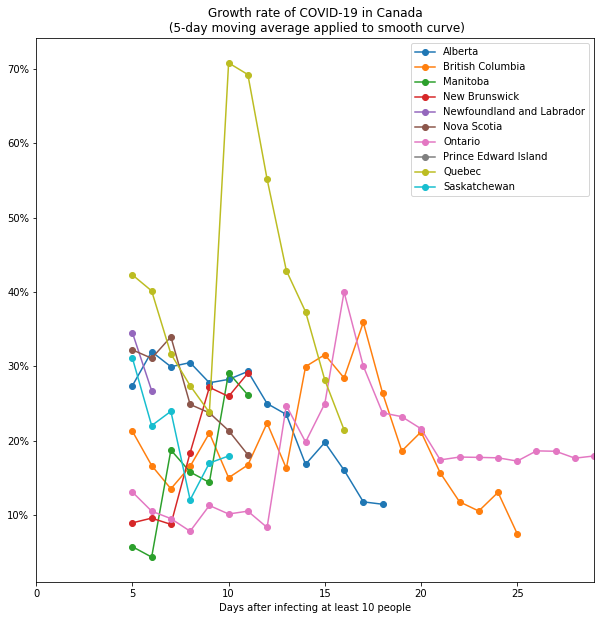

In [25]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(10, 10))

for c in data.keys():
    growth_rate = data[c].rolling(window=5).mean().pct_change() * 100.
    growth_rate.plot(marker='o')

axes.legend()
axes.yaxis.set_major_formatter(mtick.PercentFormatter())
axes.set_title("Growth rate of COVID-19 in " + title_name + "\n (5-day moving average applied to smooth curve)")
axes.set_xlabel("Days after infecting at least "+str(min_case_num)+" people")